# Vehicle Loan Defaulters Prediction

To find the people who fail to fail to pay the loan

<br>Steps for data processing -> <br><br>

✔ 1) change the directort to the project directory ✔ <br>
✔ 2) import packages ✔ <br>
✔ 3) Read DataSet ✔ <br> 
✔ 4) Descriptive Statistics - ✔ <br>
............✔ describe the data and types of variables <br> 
............✔ finding outliers <br>
............✔ mean, median, mode and other points <br>
5) ✔ treating NULL values & data cleansing ✔ <br>
6) ✔ visualisation & understanding data ✔ <br>
............✔ plot graphs between many combinations of variables <br>
............✔ take subsets and plot them <br>
7) ✔ featuring engineering ✔ <br>
............✔ making new features like find date & month & year from date feild <br>
8) ✔ CoRelation matrix and treatment of corelated features ✔ <br>
9) training data and test data spliting <br>
10) ✔ Normalisation ✔ <br>
< Save the file till here >

<br>Steps for Machine Learning (supervised learning) -> <br> <br>

< ReOpen the file which has PreProcessing done > <br>
11) feature importances / dimensionality reduction <br>
............remove unimportant features which only increase time of computing <br>
....11a) again splitting training and testing data if required <br>
12) model selection <br>
13) model building <br>
............hyper-parametere tuning <br>
............cross validation <br>
............core model building with optimised parametere <br>
14) prediction <br>
............input of test data here <br>
15) performance testing <br>
............confusion matrix (accuracy, precission, recall, f-test)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Step 1 ( Change Directory )

In [0]:
import os

os . chdir ( "/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Vehicle Loan Predictions/")
os.listdir()

['Dataset',
 'Vehicle DataSet Profiling .html',
 'Backups',
 'Vehicle Loan Prediction - PreProcessing .ipynb']

# Step 2 ( Import Packages )

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpt
import pandas_profiling
import matplotlib.pyplot as plt


%matplotlib inline


import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Step 3 ( Read DataSet )

In [0]:
dictRename = {
                "UniqueID" : "Unique_ID" ,
                "disbursed_amount" : "Disbursed_Amount" , 
                "asset_cost" : "Asset_Cost" ,
                "ltv" : "Ltv" ,
                "branch_id" : "Branch_ID" ,
                "supplier_id" : "Supplier_ID" ,
                "manufacturer_id" : "Manufacturer_ID" ,
                "Current_pincode_ID" : "Current_Pincode_ID" ,
                "Date.of.Birth" : "Date_Of_Birth" ,
                "Employment.Type" : "Employment_Type" ,
                "DisbursalDate" : "Disbursal_Date" ,
                "Employee_code_ID" : "Employee_Code_ID" ,
                "MobileNo_Avl_Flag" : "Mobile_No_Avl_Flag" ,
                "Aadhar_flag" : "Aadhar_Flag" ,
                "PAN_flag" : "PAN_Flag" ,
                "VoterID_flag" : "Voter_ID_Flag" ,
                "Driving_flag" : "Driving_Flag" ,
                "Passport_flag" : "Passport_Flag" ,
                "PERFORM_CNS.SCORE" : "Perform_CNS_Score" ,
                "PERFORM_CNS.SCORE.DESCRIPTION" : "Perform_CNS_Score_Description" ,
                "PRI.NO.OF.ACCTS" : "Pri_No_Of_Accts" ,
                "PRI.ACTIVE.ACCTS" : "Pri_Active_Accts" ,
                "PRI.OVERDUE.ACCTS" : "Pri_Overdue_Accts" ,
                "PRI.CURRENT.BALANCE" : "Pri_Current_Balance" ,
                "PRI.SANCTIONED.AMOUNT" : "Pri_Sanctioned_Amount" ,
                "PRI.DISBURSED.AMOUNT" : "Pri_Disbursed_Amount" ,
                "SEC.NO.OF.ACCTS" : "Sec_No_Of_Accts" ,
                "SEC.ACTIVE.ACCTS" : "Sec_Active_Accts" ,
                "SEC.OVERDUE.ACCTS" : "Sec_Overdue_Accts" ,
                "SEC.CURRENT.BALANCE" : "Sec_Current_Balance" ,
                "SEC.SANCTIONED.AMOUNT" : "Sec_Sanctioned_Amount" ,
                "SEC.DISBURSED.AMOUNT" : "Sec_Disbursed_Amount" ,
                "PRIMARY.INSTAL.AMT" : "Primary_Instal_AMT" ,
                "SEC.INSTAL.AMT" : "Sec_Instal_AMT" ,
                "NEW.ACCTS.IN.LAST.SIX.MONTHS" : "New_Accts_In_Last_Six_Months" ,
                "DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS" : "Delinquent_Accts_In_Last_Six_Months" ,
                "AVERAGE.ACCT.AGE" : "Average_Acct_Age" ,
                "CREDIT.HISTORY.LENGTH" : "Credit_History_Length" ,
                "NO.OF_INQUIRIES" : "No_Of_Inquiries" ,
                "loan_default" : "Loan_Default" ,
             }

In [0]:
vehicleDataset = pd . read_csv ( "Dataset/Train.csv" , parse_dates=['Date.of.Birth','DisbursalDate'] )

vehicleDataset.head(1)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [0]:
vehicleDataset = vehicleDataset . rename ( columns = dictRename )
vehicleDataset.head(1)

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,Date_Of_Birth,Employment_Type,Disbursal_Date,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Aadhar_Flag,PAN_Flag,Voter_ID_Flag,Driving_Flag,Passport_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Overdue_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,Average_Acct_Age,Credit_History_Length,No_Of_Inquiries,Loan_Default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


### Step 3.5 (Converting the year&month format to months)

In [0]:
def totalMonths ( str1 ) :
    y1 = int(str1[0])
    y2 = str1[1]
    if ( y2 == 'y' ) :
        years = y1
    else :
        years = ( (y1*10) + int(y2) )
    for i in range ( 4 , 7 ) :
        if ( str1[i] == " " ) :
            m1 = int(str1[i+1])
            m2 = str1[i+2]
    if ( m2 == 'm' ) :
        months = m1
    else :
        months = (m1*10) + int(m2)
    months += (years*12)
    return int(months)

In [0]:
vehicleDataset['Average_Acct_Age_In_Months'] = vehicleDataset['Average_Acct_Age'].apply(lambda x: totalMonths(x))
vehicleDataset['Credit_History_Length_In_Months'] = vehicleDataset['Credit_History_Length'].apply(lambda x: totalMonths(x))
vehicleDataset . head ( 5 )

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,Date_Of_Birth,Employment_Type,Disbursal_Date,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Aadhar_Flag,PAN_Flag,Voter_ID_Flag,Driving_Flag,Passport_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Overdue_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,Average_Acct_Age,Credit_History_Length,No_Of_Inquiries,Loan_Default,Average_Acct_Age_In_Months,Credit_History_Length_In_Months
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,2018-01-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,2018-10-26,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,8,15
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,Self employed,2018-09-26,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,0,0


# Step 4 ( Descriptive Statistics )

#### How many NULL values ???

In [0]:
vehicleDataset . isnull() . sum()

Unique_ID                                 0
Disbursed_Amount                          0
Asset_Cost                                0
Ltv                                       0
Branch_ID                                 0
Supplier_ID                               0
Manufacturer_ID                           0
Current_Pincode_ID                        0
Date_Of_Birth                             0
Employment_Type                        7661
Disbursal_Date                            0
State_ID                                  0
Employee_Code_ID                          0
Mobile_No_Avl_Flag                        0
Aadhar_Flag                               0
PAN_Flag                                  0
Voter_ID_Flag                             0
Driving_Flag                              0
Passport_Flag                             0
Perform_CNS_Score                         0
Perform_CNS_Score_Description             0
Pri_No_Of_Accts                           0
Pri_Active_Accts                

In [0]:
vehicleDataset.Employment_Type.unique()

array(['Salaried', 'Self employed', nan], dtype=object)

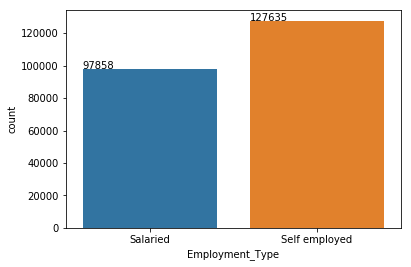

In [0]:
ax = sns.countplot( x="Employment_Type", data = vehicleDataset )

for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x(), i.get_height()))

#### Info about dataset

In [0]:
vehicleDataset . info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 43 columns):
Unique_ID                              233154 non-null int64
Disbursed_Amount                       233154 non-null int64
Asset_Cost                             233154 non-null int64
Ltv                                    233154 non-null float64
Branch_ID                              233154 non-null int64
Supplier_ID                            233154 non-null int64
Manufacturer_ID                        233154 non-null int64
Current_Pincode_ID                     233154 non-null int64
Date_Of_Birth                          233154 non-null datetime64[ns]
Employment_Type                        225493 non-null object
Disbursal_Date                         233154 non-null datetime64[ns]
State_ID                               233154 non-null int64
Employee_Code_ID                       233154 non-null int64
Mobile_No_Avl_Flag                     233154 non-null int64
Aadhar_Flag   

✔✔✔ This is correct, completely matched with dataset ✔✔✔

In [0]:
vehicleDataset . describe ()

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Aadhar_Flag,PAN_Flag,Voter_ID_Flag,Driving_Flag,Passport_Flag,Perform_CNS_Score,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Overdue_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,No_Of_Inquiries,Loan_Default,Average_Acct_Age_In_Months,Credit_History_Length_In_Months
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.0,233154.00000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,1.0,0.84032,0.075577,0.144943,0.023242,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.059081,0.027703,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071,8.915764,16.252404
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,0.0,0.36631,0.264320,0.352044,0.150672,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.626795,0.316057,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252,15.106416,28.581255
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,1.0,1.00000,0.000000,0.000000,0.000000,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,13.000000,24.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000,369.000000,468.000000


In [0]:
#profileData = pandas_profiling.ProfileReport ( vehicleDataset )
#profileData.to_file ( "Vehicle DataSet Profiling - 1 .html" )
#profileData

Inference - <br>
1) Mobile_No_Avl_Flag has constant value so it has to be deleted <br>
2) Pri_Disbursed_Amount ---corelated---> Pri_Sanctioned_Amount ( corr = 99.8% ) <br>
3) Sec_Disbursed_Amount ---corelated---> Sec_Sanctioned_Amount ( corr = 99.9% ) <br>
3) Sec_Sanctioned_Amount ---corelated---> Sec_Current_Balance ( corr = 92.9% ) <br>

In [0]:
vehicleDataset['Employment_Type'] . fillna ( method = "ffill" , inplace = True )

sum ( vehicleDataset . isnull() . sum() )

0

We did forward fill in this case cause the null values were of 2 catogories - <br>
1) Salaried                 -> about 1Lakh <br>
2) Self Employed      -> about 1.25Lakhs <br>
So as there is no class which has a great majority, and the 2 classes are pretty close in value, we did forward fill to evenly distribute the data and fill null cells evenly. This case has no specific column that can be filled as there are 7000+ values to be filled. The difference between the classes is too small to give any 1 particular class a clear majority

#### Outlier Treatment 

We will not treat the outliers in this dataset as - <br>
.......... a) the outliers in this dataset can be real values. Like Asset_Cost has many high values which should <br>
................... be considered as outliers. But at the same time, there can be real cases that take high amounts <br>
................... so it won't be outliers <br>
.......... b) the rows that actually have outliers have outliers in all columns. Like Asset_Cost has outliers but <br>................... Average_Acct_Age has outliers for the same customer. And this is logically coming out to be true <br> 
................... in this case as no sngle cell/column has outliers. If the amount takeen is high, repay time is high. <br>
................... So for such cases, we will not treat outliers in this dataset

# Step 6 (Visualisation)

##### Histogram

In [0]:
plt.rcParams['figure.figsize'] = [7.5, 7.5]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc599bebe0>,
      dtype=object)

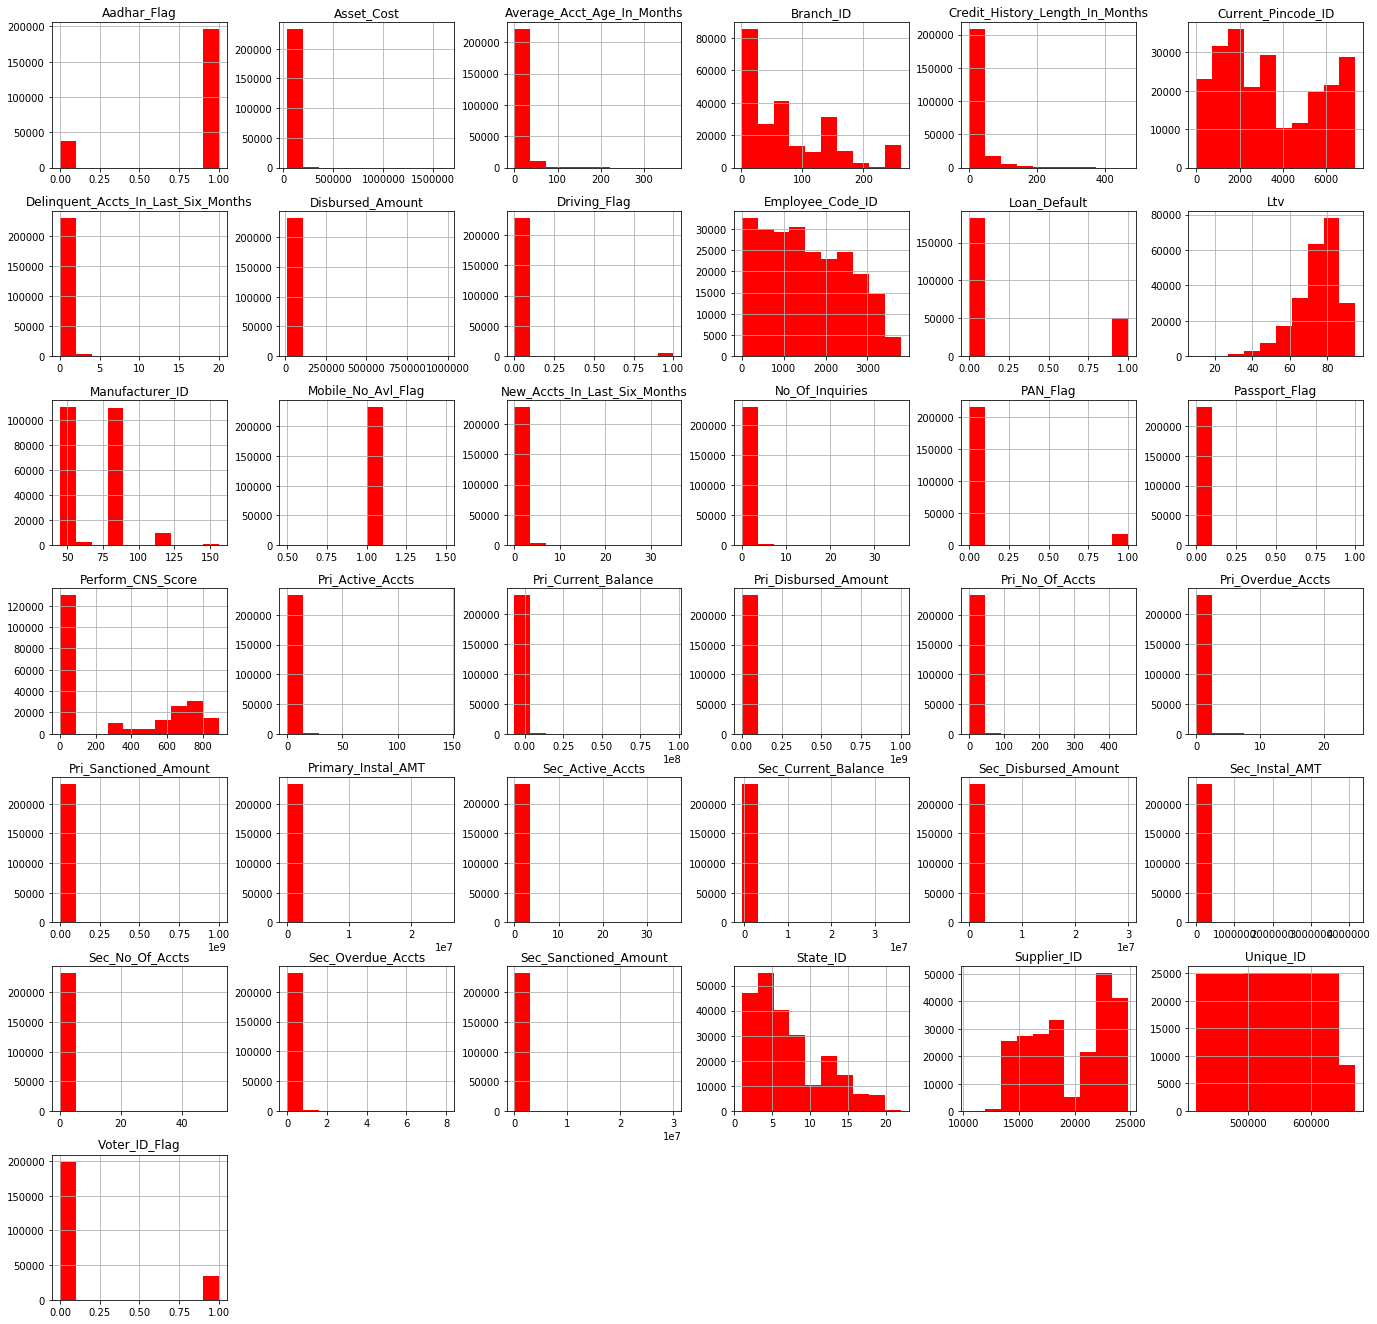

In [0]:
vehicleDataset[vehicleDataset.dtypes[(vehicleDataset.dtypes=="float64")|(vehicleDataset.dtypes=="int64")].index.values].hist( figsize=[23.5,23.5] , color = 'r' )

##### Box Plot

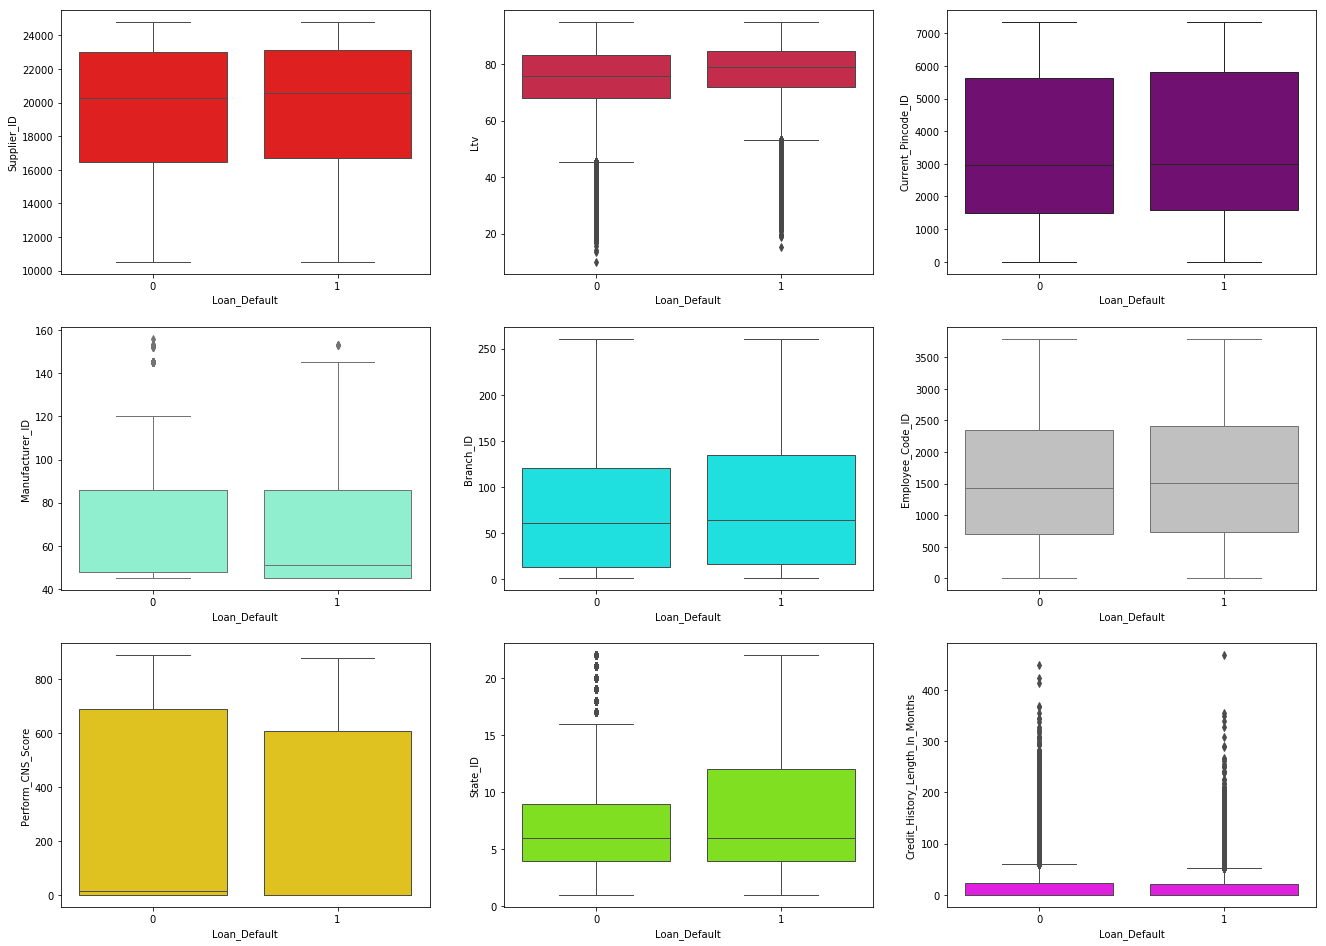

In [0]:
plt.rcParams['figure.figsize'] = [22.5, 16.5]

fig, ( (ax1, ax2, ax3) , (ax4, ax5, ax6) , (ax7, ax8, ax9) ) = plt.subplots(nrows=3, ncols=3)

sns.boxplot( x='Loan_Default', y='Credit_History_Length_In_Months', data=vehicleDataset, linewidth=1, ax=ax9, color='magenta')
sns.boxplot( x='Loan_Default', y='Branch_ID', data=vehicleDataset, linewidth=1, ax=ax5, color='cyan')
sns.boxplot( x='Loan_Default', y='Supplier_ID', data=vehicleDataset, linewidth=1, ax=ax1, color='red')
sns.boxplot( x='Loan_Default', y='Manufacturer_ID', data=vehicleDataset, linewidth=1, ax=ax4, color='aquamarine')
sns.boxplot( x='Loan_Default', y='Current_Pincode_ID', data=vehicleDataset, linewidth=1, ax=ax3, color='purple')
sns.boxplot( x='Loan_Default', y='State_ID', data=vehicleDataset, linewidth=1, ax=ax8, color='chartreuse')
sns.boxplot( x='Loan_Default', y='Perform_CNS_Score', data=vehicleDataset, linewidth=1, ax=ax7, color='gold')
sns.boxplot( x='Loan_Default', y='Employee_Code_ID', data=vehicleDataset, linewidth=1, ax=ax6, color='silver')
sns.boxplot( x='Loan_Default', y='Ltv', data=vehicleDataset, linewidth=1, ax=ax2, color='crimson')


##### Distribution Plot

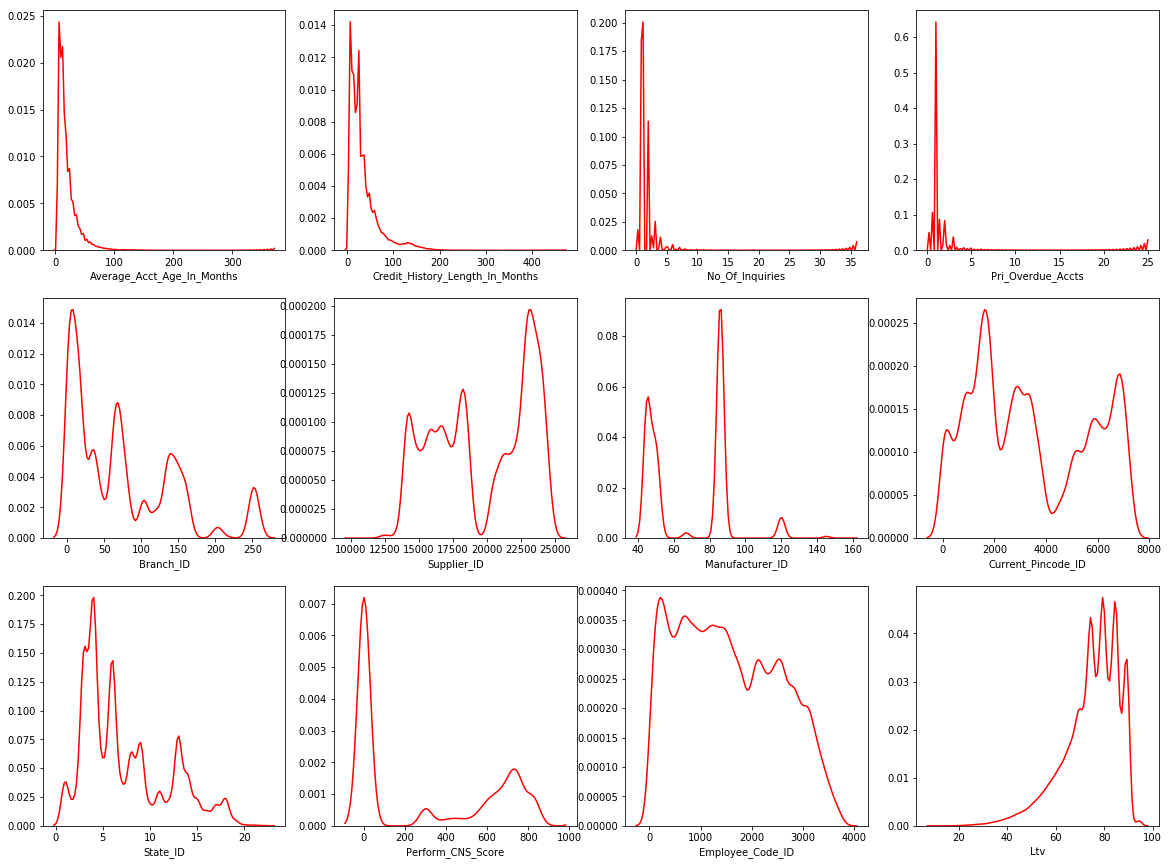

In [0]:
plt.rcParams['figure.figsize'] = [20, 15]

fig, ((ax1, ax2, ax3, ax4) , ( ax5, ax6, ax7, ax8) , ( ax9, ax10, ax11, ax12) ) = plt.subplots(nrows=3, ncols=4)

sns.distplot( vehicleDataset['Average_Acct_Age_In_Months'], hist=False, rug=False, color='red', ax=ax1)
sns.distplot( vehicleDataset['Credit_History_Length_In_Months'], hist=False, rug=False, color='red', ax=ax2)
sns.distplot( vehicleDataset['No_Of_Inquiries'], hist=False, rug=False, color='red', ax=ax3)
sns.distplot( vehicleDataset['Pri_Overdue_Accts'], hist=False, rug=False, color='red', ax=ax4)
sns.distplot( vehicleDataset['Branch_ID'], hist=False, rug=False, color='red', ax=ax5)
sns.distplot( vehicleDataset['Supplier_ID'], hist=False, rug=False, color='red', ax=ax6)
sns.distplot( vehicleDataset['Manufacturer_ID'], hist=False, rug=False, color='red', ax=ax7)
sns.distplot( vehicleDataset['Current_Pincode_ID'], hist=False, rug=False, color='red', ax=ax8)
sns.distplot( vehicleDataset['State_ID'], hist=False, rug=False, color='red', ax=ax9)
sns.distplot( vehicleDataset['Perform_CNS_Score'], hist=False, rug=False, color='red', ax=ax10)
sns.distplot( vehicleDataset['Employee_Code_ID'], hist=False, rug=False, color='red', ax=ax11)
sns.distplot( vehicleDataset['Ltv'], hist=False, rug=False, color='red', ax=ax12)


##### Scatter Plot

This shows the state wise distribution of other important factors for easy comparision state wise 



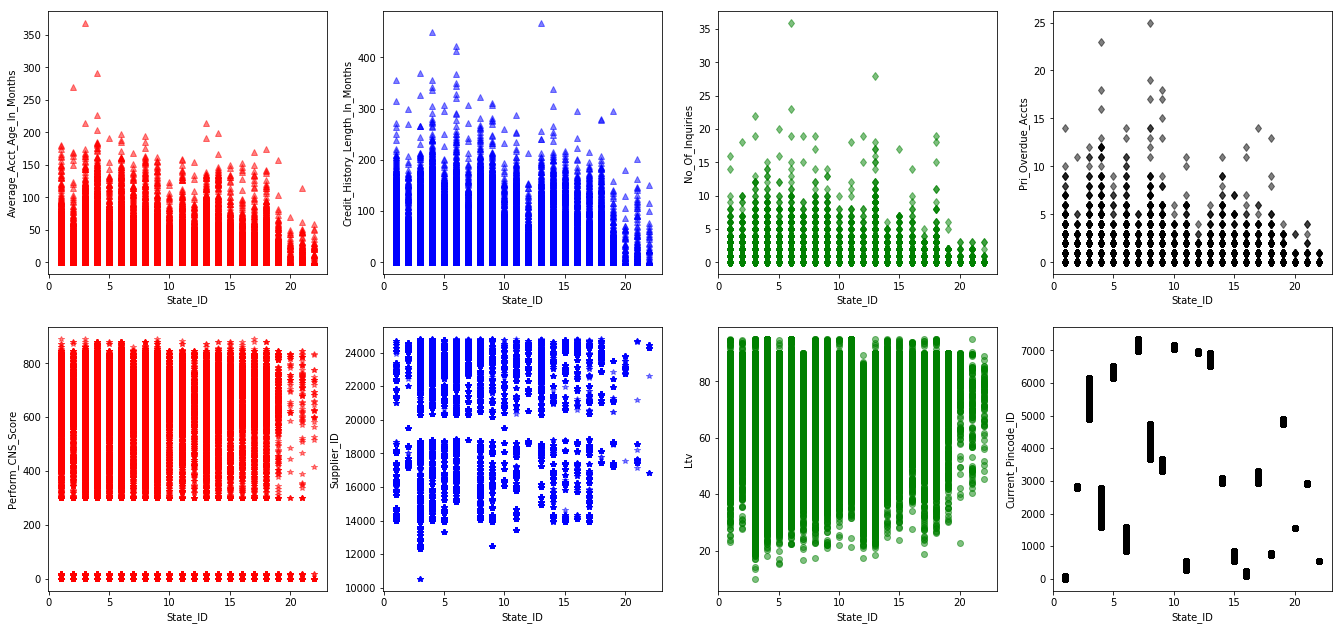

In [0]:
plt.rcParams['figure.figsize'] = [ 23, 16.5]
plt.figure()

plt.subplot( 3, 4, 1)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Average_Acct_Age_In_Months'], 'r^', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Average_Acct_Age_In_Months')

plt.subplot( 3, 4, 2)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Credit_History_Length_In_Months'], 'b^', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Credit_History_Length_In_Months')

plt.subplot( 3, 4, 3)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['No_Of_Inquiries'], 'gd', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('No_Of_Inquiries')

plt.subplot( 3, 4, 4)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Pri_Overdue_Accts'], 'kd', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Pri_Overdue_Accts')

plt.subplot( 3, 4, 5)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Perform_CNS_Score'], 'r*', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Perform_CNS_Score')

plt.subplot( 3, 4, 6)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Supplier_ID'], 'b*', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Supplier_ID')

plt.subplot( 3, 4, 7)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Ltv'], 'go', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Ltv')

plt.subplot( 3, 4, 8)
plt.plot( vehicleDataset['State_ID'], vehicleDataset['Current_Pincode_ID'], 'ko', alpha=0.5)
plt.xlabel('State_ID')
plt.ylabel('Current_Pincode_ID')

print ( "This shows the state wise distribution of other important factors for easy comparision state wise \n")

# Step 7 ( Feature Engineering )

Categorical Variables - <br>
1) manufacturer_id --- Manufacturer_ID <br>
2) Employment.Type --- Employment_Type <br>
3) State_ID --- State_ID <br>
4) Aadhar_flag --- Aadhar_Flag <br>
5) PAN_flag --- PAN_Flag <br>
6) VoterID_flag --- Voter_ID_Flag <br>
7) Driving_flag --- Driving_Flag <br>
8) Passport_flag --- Passport_Flag <br>
9) PERFORM_CNS.SCORE.DESCRIPTION --- Perform_CNS_Score_Description <br>
10) PRI.ACTIVE.ACCTS --- Pri_Active_Accts <br>
11) PRI.OVERDUE.ACCTS --- Pri_Overdue_Accts <br>
12) SEC.NO.OF.ACCTS --- Sec_No_Of_Accts <br>
13) SEC.ACTIVE.ACCTS --- Sec_Active_Accts <br>
14) SEC.OVERDUE.ACCTS --- Sec_Overdue_Accts <br>
15) NEW.ACCTS.IN.LAST.SIX.MONTHS --- New_Accts_In_Last_Six_Months <br>
16) DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS --- Delinquent_Accts_In_Last_Six_Months <br>
17) NO.OF_INQUIRIES --- No_Of_Inquiries <br>


Continous Variables - <br>
1) disbursed_amount --- Disbursed_Amount <br>
2) asset_cost --- Asset_Cost <br>
3) ltv --- Ltv <br>
4) branch_id --- Branch_ID <br>
5) supplier_id --- Supplier_ID <br>
6) Current_pincode_ID --- Current_Pincode_ID <br>
7) UniqueID --- Unique_ID <br>
8) Employee_code_ID --- Employee_Code_ID<br>
9) PERFORM_CNS.SCORE --- Perform_CNS_Score <br>
10) PRI.NO.OF.ACCTS --- Pri_No_Of_Accts <br>
12) PRI.CURRENT.BALANCE --- Pri_Current_Balance <br>
13) PRI.SANCTIONED.AMOUNT --- Pri_Sanctioned_Amount <br>
14) PRI.DISBURSED.AMOUNT --- Pri_Disbursed_Amount <br>
15) SEC.CURRENT.BALANCE --- Sec_Current_Balance <br>
16) SEC.SANCTIONED.AMOUNT --- Sec_Sanctioned_Amount<br>
17) SEC.DISBURSED.AMOUNT --- Sec_Disbursed_Amount <br>
18) PRIMARY.INSTAL.AMT --- Primary_Instal_AMT <br>
19) SEC.INSTAL.AMT --- Sec_Instal_AMT <br>
20) Average_Acct_Age_In_Months <br>
21) Credit_History_Length_In_Months

In [0]:
continousVariables = [
                            'Disbursed_Amount' ,
                            'Asset_Cost' ,
                            'Ltv' , 
                            'Branch_ID' ,
                            'Supplier_ID' ,
                            'Current_Pincode_ID' ,
                            'Unique_ID' ,
                            'Employee_Code_ID' ,
                            'Perform_CNS_Score' ,
                            'Pri_No_Of_Accts' ,
                            'Pri_Current_Balance' ,
                            'Sec_Sanctioned_Amount' ,
                            'Sec_Disbursed_Amount' ,
                            'Primary_Instal_AMT' ,
                            'Sec_Instal_AMT' ,
                            'Average_Acct_Age_In_Months' ,
                            'Credit_History_Length_In_Months'
                       ]

for i in continousVariables :
    len1 = len ( vehicleDataset[i] . unique () )
    print ( i , ' = ' , len1 )

Disbursed_Amount  =  24565
Asset_Cost  =  46252
Ltv  =  6579
Branch_ID  =  82
Supplier_ID  =  2953
Current_Pincode_ID  =  6698
Unique_ID  =  233154
Employee_Code_ID  =  3270
Perform_CNS_Score  =  573
Pri_No_Of_Accts  =  108
Pri_Current_Balance  =  71341
Sec_Sanctioned_Amount  =  2223
Sec_Disbursed_Amount  =  2553
Primary_Instal_AMT  =  28067
Sec_Instal_AMT  =  1918
Average_Acct_Age_In_Months  =  192
Credit_History_Length_In_Months  =  294


<br> Continous Variables To Keep - <br><br>

4) Disbursed_Amount <br> 
2) Asset_Cost <br>
5) Ltv <br>
1) Pri_Current_Balance <br>
3) Primary_Instal_AMT  <br>

In [0]:
# Categorical Mean & Median on State_ID

vehicleDataset['DisbursedAmount_CatoMean_OnStateID'] = vehicleDataset.groupby('State_ID')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnStateID'] = vehicleDataset.groupby('State_ID')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnStateID'] = vehicleDataset.groupby('State_ID')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnStateID'] = vehicleDataset.groupby('State_ID')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnStateID'] = vehicleDataset.groupby('State_ID')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnStateID'] = vehicleDataset.groupby('State_ID')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnStateID'] = vehicleDataset.groupby('State_ID')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnStateID'] = vehicleDataset.groupby('State_ID')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnStateID'] = vehicleDataset.groupby('State_ID')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnStateID'] = vehicleDataset.groupby('State_ID')['Primary_Instal_AMT'].transform(lambda x:x.median())





# Categorical Mean & Median on Pri_Active_Accts

vehicleDataset['DisbursedAmount_CatoMean_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnPriActiveAccts'] = vehicleDataset.groupby('Pri_Active_Accts')['Primary_Instal_AMT'].transform(lambda x:x.median())






# Categorical Mean & Median on Pri_Overdue_Accts

vehicleDataset['DisbursedAmount_CatoMean_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts'] = vehicleDataset.groupby('Pri_Overdue_Accts')['Primary_Instal_AMT'].transform(lambda x:x.median())





# Categorical Mean & Median on Sec_No_Of_Accts

vehicleDataset['DisbursedAmount_CatoMean_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts'] = vehicleDataset.groupby('Sec_No_Of_Accts')['Primary_Instal_AMT'].transform(lambda x:x.median())






# Categorical Mean & Median on Sec_Active_Accts

vehicleDataset['DisbursedAmount_CatoMean_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnSecActiveAccts'] = vehicleDataset.groupby('Sec_Active_Accts')['Primary_Instal_AMT'].transform(lambda x:x.median())






# Categorical Mean & Median on New_Accts_In_Last_Six_Months

vehicleDataset['DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths'] = vehicleDataset.groupby('New_Accts_In_Last_Six_Months')['Primary_Instal_AMT'].transform(lambda x:x.median())







# Categorical Mean & Median on No_Of_Inquiries

vehicleDataset['DisbursedAmount_CatoMean_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Disbursed_Amount'].transform(lambda x:x.mean())
vehicleDataset['AssetCost_CatoMean_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Asset_Cost'].transform(lambda x:x.mean())
vehicleDataset['Ltv_CatoMean_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Ltv'].transform(lambda x:x.mean())
vehicleDataset['PriCurrentBalance_CatoMean_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Pri_Current_Balance'].transform(lambda x:x.mean())
vehicleDataset['PrimaryInstalAMT_CatoMean_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Primary_Instal_AMT'].transform(lambda x:x.mean())

vehicleDataset['DisbursedAmount_CatoMedian_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Disbursed_Amount'].transform(lambda x:x.median())
vehicleDataset['AssetCost_CatoMedian_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Asset_Cost'].transform(lambda x:x.median())
vehicleDataset['Ltv_CatoMedian_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Ltv'].transform(lambda x:x.median())
vehicleDataset['PriCurrentBalance_CatoMedian_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Pri_Current_Balance'].transform(lambda x:x.median())
vehicleDataset['PrimaryInstalAMT_CatoMedian_OnNoOfInquiries'] = vehicleDataset.groupby('No_Of_Inquiries')['Primary_Instal_AMT'].transform(lambda x:x.median())


In [0]:
vehicleDataset['DateOfBirth_Day'] = vehicleDataset.Date_Of_Birth.dt.day
vehicleDataset['DateOfBirth_Month'] = vehicleDataset.Date_Of_Birth.dt.month
vehicleDataset['DateOfBirth_Year'] = vehicleDataset.Date_Of_Birth.dt.year
vehicleDataset['DateOfBirth_Weekday'] = vehicleDataset.Date_Of_Birth.dt.weekday
vehicleDataset['DateOfBirth_Week'] = vehicleDataset.Date_Of_Birth.dt.week

vehicleDataset['DisbursalDate_Day'] = vehicleDataset.Disbursal_Date.dt.day
vehicleDataset['DisbursalDate_Month'] = vehicleDataset.Disbursal_Date.dt.month
vehicleDataset['DisbursalDate_Year'] = vehicleDataset.Disbursal_Date.dt.year
vehicleDataset['DisbursalDate_Weekday'] = vehicleDataset.Disbursal_Date.dt.weekday
vehicleDataset['DisbursalDate_Week'] = vehicleDataset.Disbursal_Date.dt.week
vehicleDataset.head(10)

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,Date_Of_Birth,Employment_Type,Disbursal_Date,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Aadhar_Flag,PAN_Flag,Voter_ID_Flag,Driving_Flag,Passport_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Overdue_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,Average_Acct_Age,Credit_History_Length,No_Of_Inquiries,Loan_Default,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,2018-03-08,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,0,0,51410.941203,68775.013849,77.283698,213002.828563,8048.377048,51578.0,66300.

# Step 8 ( CoRelation Matrix )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


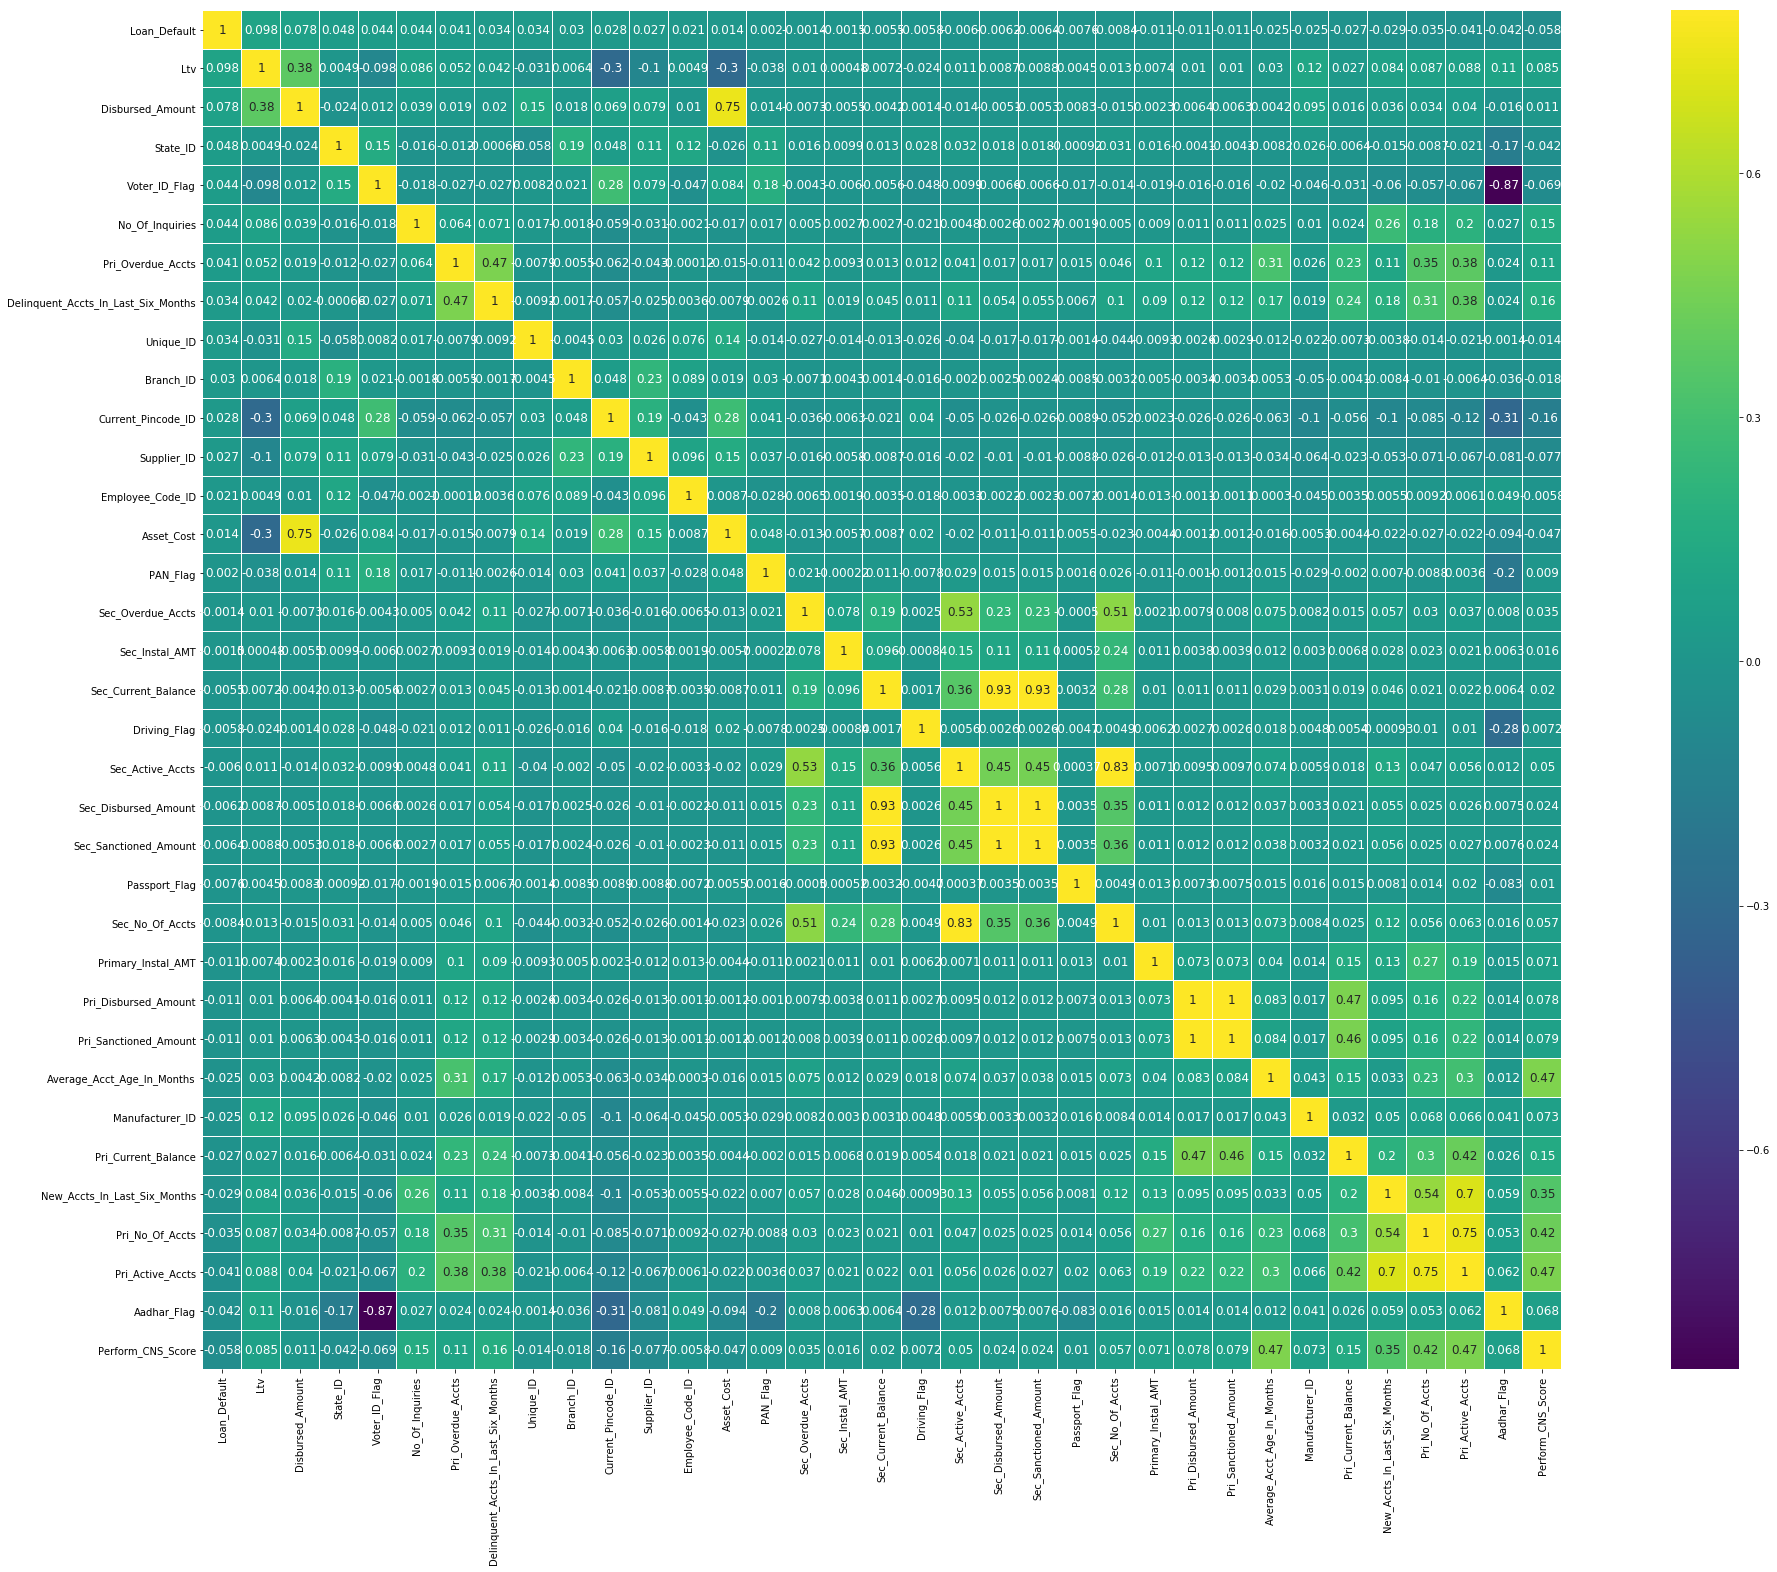

In [0]:
vehicle_truncated = vehicleDataset.ix[:,:42]

k= vehicle_truncated.select_dtypes(include=[np.number]).columns.size
correlation = vehicle_truncated.select_dtypes(include=[np.number]).corr()
#Build correlation matrix for target variable
cols = correlation.nlargest(k,'Loan_Default')['Loan_Default'].index
cm = np.corrcoef(vehicleDataset[cols].values.T)
f , ax = plt.subplots(figsize = (39,25))
sns.heatmap( cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', linecolor="white", xticklabels=cols.values, annot_kws={'size':12}, yticklabels=cols.values)

# Steep 9 ( One-Hot/Label Encoding)

Categorical Variables - <br>
1) manufacturer_id --- Manufacturer_ID <br>
2) Employment.Type --- Employment_Type <br>
3) State_ID --- State_ID <br>
4) Aadhar_flag --- Aadhar_Flag <br>
5) PAN_flag --- PAN_Flag <br>
6) VoterID_flag --- Voter_ID_Flag <br>
7) Driving_flag --- Driving_Flag <br>
8) Passport_flag --- Passport_Flag <br>
9) PERFORM_CNS.SCORE.DESCRIPTION --- Perform_CNS_Score_Description <br>
10) PRI.ACTIVE.ACCTS --- Pri_Active_Accts <br>
11) PRI.OVERDUE.ACCTS --- Pri_Overdue_Accts <br>
12) SEC.NO.OF.ACCTS --- Sec_No_Of_Accts <br>
13) SEC.ACTIVE.ACCTS --- Sec_Active_Accts <br>
14) SEC.OVERDUE.ACCTS --- Sec_Overdue_Accts <br>
15) NEW.ACCTS.IN.LAST.SIX.MONTHS --- New_Accts_In_Last_Six_Months <br>
16) DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS --- Delinquent_Accts_In_Last_Six_Months <br>
17) NO.OF_INQUIRIES --- No_Of_Inquiries <br>


In [0]:
categoricalVariables = [
                            'Manufacturer_ID' ,
                            'Employment_Type' ,
                            'State_ID' , 
                            'Aadhar_Flag' ,
                            'PAN_Flag' ,
                            'Voter_ID_Flag' ,
                            'Driving_Flag' ,
                            'Passport_Flag' ,
                            'Perform_CNS_Score_Description' ,
                            'Pri_Active_Accts' ,
                            'Pri_Overdue_Accts' ,
                            'Sec_No_Of_Accts' ,
                            'Sec_Active_Accts' ,
                            'Sec_Overdue_Accts' ,
                            'New_Accts_In_Last_Six_Months' ,
                            'Delinquent_Accts_In_Last_Six_Months' ,
                            'No_Of_Inquiries'
                       ]

for i in categoricalVariables :
    len1 = len ( vehicleDataset[i] . unique () )
    print ( i , ' = ' , len1 )

Manufacturer_ID  =  11
Employment_Type  =  2
State_ID  =  22
Aadhar_Flag  =  2
PAN_Flag  =  2
Voter_ID_Flag  =  2
Driving_Flag  =  2
Passport_Flag  =  2
Perform_CNS_Score_Description  =  20
Pri_Active_Accts  =  40
Pri_Overdue_Accts  =  22
Sec_No_Of_Accts  =  37
Sec_Active_Accts  =  23
Sec_Overdue_Accts  =  9
New_Accts_In_Last_Six_Months  =  26
Delinquent_Accts_In_Last_Six_Months  =  14
No_Of_Inquiries  =  25


In [0]:
# For variables that have 2 categories of data
vehicleDataset = pd.get_dummies( vehicleDataset, columns=['Employment_Type','Aadhar_Flag','PAN_Flag','Voter_ID_Flag','Driving_Flag','Passport_Flag'],prefix=['EmploymentType','AadharFlag','PANFlag','VoterIDFlag','DrivingFlag','PassportFlag'], drop_first = True)

# For variables that have more than 2 categories of data
vehicleDataset = pd.get_dummies( vehicleDataset, columns=['Sec_Overdue_Accts'], prefix=['SecOverdueAccts'], drop_first = False)

vehicleDataset.head(1)

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,Date_Of_Birth,Disbursal_Date,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,Average_Acct_Age,Credit_History_Length,No_Of_Inquiries,Loan_Default,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-03-08,6,1998,1,0,No Bureau History Avai

In [0]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

vehicleDataset['Manufacturer_ID']= label_encoder.fit_transform(vehicleDataset['Manufacturer_ID'])
vehicleDataset['State_ID']= label_encoder.fit_transform(vehicleDataset['State_ID'])
vehicleDataset['Perform_CNS_Score_Description']= label_encoder.fit_transform(vehicleDataset['Perform_CNS_Score_Description'])
vehicleDataset['Pri_Active_Accts']= label_encoder.fit_transform(vehicleDataset['Pri_Active_Accts'])
vehicleDataset['Pri_Overdue_Accts']= label_encoder.fit_transform(vehicleDataset['Pri_Overdue_Accts'])
vehicleDataset['Sec_No_Of_Accts']= label_encoder.fit_transform(vehicleDataset['Sec_No_Of_Accts'])
vehicleDataset['Sec_Active_Accts']= label_encoder.fit_transform(vehicleDataset['Sec_Active_Accts'])
vehicleDataset['New_Accts_In_Last_Six_Months']= label_encoder.fit_transform(vehicleDataset['New_Accts_In_Last_Six_Months'])
vehicleDataset['Delinquent_Accts_In_Last_Six_Months']= label_encoder.fit_transform(vehicleDataset['Delinquent_Accts_In_Last_Six_Months'])
vehicleDataset['No_Of_Inquiries']= label_encoder.fit_transform(vehicleDataset['No_Of_Inquiries'])

vehicleDataset.head(1)

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,Date_Of_Birth,Disbursal_Date,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Pri_Disbursed_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Current_Balance,Sec_Sanctioned_Amount,Sec_Disbursed_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,Average_Acct_Age,Credit_History_Length,No_Of_Inquiries,Loan_Default,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,420825,50578,58400,89.55,67,22807,0,1441,1984-01-01,2018-03-08,5,1998,1,0,13,0,0,0,0,0,0,0,0,0,0,

#### Deleting CoRelated Columns

Highly CoRelated Columns -> <br><br>

1) a) Sec_Sanctioned_Amount -> Sec_Disbursed_Amount <br>
1) b) Sec_Disbursed_Amount -> Sec_Current_Balance <br>
1) c) Sec_Sanctioned_Amount -> Sec_Current_Balance <br><br>

2) Pri_Sanctioned_Amount -> Pri_Disbursed_Amount <br><br>

3) Voter_ID_Flag -> Aadhar_Flag <br><br>

To Delete Columns -> <br>

1) **Sec_Sanctioned_Amount**  or  **Sec_Disbursed_Amount**  or  **Sec_Current_Balance** <br>

2) **Pri_Sanctioned_Amount**  or  **Pri_Disbursed_Amount** <br>

3) **Voter_ID_Flag**  or  **Aadhar_Flag** <br><br>

CoRelation with Target Variable <br><br>

Case 1 -> <br>
a) Sec_Sanctioned_Amount = 0.0064 <br>
b) Sec_Disbursed_Amount = 0.0062 <br>
c) Sec_Current_Balance = 0.0055 <br>
Therefore, we will keep **Sec_Sanctioned_Amount** as it has highest CoRelation with target variable <br><br>

Case 2 -> <br>
a) Pri_Sanctioned_Amount = 0.011 <br>
b) Pri_Disbursed_Amount = 0.011 <br>
Therefore, we will keep **Pri_Sanctioned_Amount** as it has highest CoRelation with other variables <br>
Here both the variables have equal CoRelation with target so we compare it with other variables <br><br>

Case 3 -> <br>
a) Aadhar_Flag = 0.042 <br>
b) Voter_ID_Flag = 0.044 <br>
Therefore, we will keep **Voter_ID_Flag** as it has highest CoRelation with other variables <br><br>

In [0]:
del vehicleDataset['Sec_Disbursed_Amount']

In [0]:
del vehicleDataset['Sec_Current_Balance']
del vehicleDataset['Pri_Disbursed_Amount']

In [0]:
del vehicleDataset['Date_Of_Birth']
del vehicleDataset['Disbursal_Date']
del vehicleDataset['Average_Acct_Age']
del vehicleDataset['Credit_History_Length']

In [0]:
for col in vehicleDataset.columns: 
    print(col) 

Unique_ID
Disbursed_Amount
Asset_Cost
Ltv
Branch_ID
Supplier_ID
Manufacturer_ID
Current_Pincode_ID
State_ID
Employee_Code_ID
Mobile_No_Avl_Flag
Perform_CNS_Score
Perform_CNS_Score_Description
Pri_No_Of_Accts
Pri_Active_Accts
Pri_Overdue_Accts
Pri_Current_Balance
Pri_Sanctioned_Amount
Sec_No_Of_Accts
Sec_Active_Accts
Sec_Sanctioned_Amount
Primary_Instal_AMT
Sec_Instal_AMT
New_Accts_In_Last_Six_Months
Delinquent_Accts_In_Last_Six_Months
No_Of_Inquiries
Loan_Default
Average_Acct_Age_In_Months
Credit_History_Length_In_Months
DisbursedAmount_CatoMean_OnStateID
AssetCost_CatoMean_OnStateID
Ltv_CatoMean_OnStateID
PriCurrentBalance_CatoMean_OnStateID
PrimaryInstalAMT_CatoMean_OnStateID
DisbursedAmount_CatoMedian_OnStateID
AssetCost_CatoMedian_OnStateID
Ltv_CatoMedian_OnStateID
PriCurrentBalance_CatoMedian_OnStateID
PrimaryInstalAMT_CatoMedian_OnStateID
DisbursedAmount_CatoMean_OnPriActiveAccts
AssetCost_CatoMean_OnPriActiveAccts
Ltv_CatoMean_OnPriActiveAccts
PriCurrentBalance_CatoMean_OnPriAct

# Step 10 (Normalisation)

In [0]:
vehicleDataset[:43].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Columns: 124 entries, Unique_ID to SecOverdueAccts_8
dtypes: float64(70), int64(39), uint8(15)
memory usage: 37.3 KB


In [0]:
train_predictors = vehicleDataset.drop('Loan_Default', axis = 1).select_dtypes(exclude = ['object','datetime64'])

In [0]:
from sklearn.preprocessing import StandardScaler
#Normalise the data with standard scalar
std_scale = StandardScaler().fit(train_predictors)
train_predictors1 = pd.DataFrame(std_scale.transform(train_predictors))
train_predictors1.columns  = train_predictors.columns
train_predictors = train_predictors1

train_predictors.head()

,Unique_ID,Disbursed_Amount,Asset_Cost,Ltv,Branch_ID,Supplier_ID,Manufacturer_ID,Current_Pincode_ID,State_ID,Employee_Code_ID,Mobile_No_Avl_Flag,Perform_CNS_Score,Perform_CNS_Score_Description,Pri_No_Of_Accts,Pri_Active_Accts,Pri_Overdue_Accts,Pri_Current_Balance,Pri_Sanctioned_Amount,Sec_No_Of_Accts,Sec_Active_Accts,Sec_Sanctioned_Amount,Primary_Instal_AMT,Sec_Instal_AMT,New_Accts_In_Last_Six_Months,Delinquent_Accts_In_Last_Six_Months,No_Of_Inquiries,Average_Acct_Age_In_Months,Credit_History_Length_In_Months,DisbursedAmount_CatoMean_OnStateID,AssetCost_CatoMean_OnStateID,Ltv_CatoMean_OnStateID,PriCurrentBalance_CatoMean_OnStateID,PrimaryInstalAMT_CatoMean_OnStateID,DisbursedAmount_CatoMedian_OnStateID,AssetCost_CatoMedian_OnStateID,Ltv_CatoMedian_OnStateID,PriCurrentBalance_CatoMedian_OnStateID,PrimaryInstalAMT_CatoMedian_OnStateID,DisbursedAmount_CatoMean_OnPriActiveAccts,AssetCost_CatoMean_OnPriActiveAccts,Ltv_CatoMean_OnPriActiveAccts,PriCurrentBalance_CatoMean_OnPriActiveAccts,PrimaryInstalAMT_CatoMean_OnPriActiveAccts,DisbursedAmount_CatoMedian_OnPriActiveAccts,AssetCost_CatoMedian_OnPriActiveAccts,Ltv_CatoMedian_OnPriActiveAccts,PriCurrentBalance_CatoMedian_OnPriActiveAccts,PrimaryInstalAMT_CatoMedian_OnPriActiveAccts,DisbursedAmount_CatoMean_OnPriOverdueAccts,AssetCost_CatoMean_OnPriOverdueAccts,Ltv_CatoMean_OnPriOverdueAccts,PriCurrentBalance_CatoMean_OnPriOverdueAccts,PrimaryInstalAMT_CatoMean_OnPriOverdueAccts,DisbursedAmount_CatoMedian_OnPriOverdueAccts,AssetCost_CatoMedian_OnPriOverdueAccts,Ltv_CatoMedian_OnPriOverdueAccts,PriCurrentBalance_CatoMedian_OnPriOverdueAccts,PrimaryInstalAMT_CatoMedian_OnPriOverdueAccts,DisbursedAmount_CatoMean_OnSecNoOfAccts,AssetCost_CatoMean_OnSecNoOfAccts,Ltv_CatoMean_OnSecNoOfAccts,PriCurrentBalance_CatoMean_OnSecNoOfAccts,PrimaryInstalAMT_CatoMean_OnSecNoOfAccts,DisbursedAmount_CatoMedian_OnSecNoOfAccts,AssetCost_CatoMedian_OnSecNoOfAccts,Ltv_CatoMedian_OnSecNoOfAccts,PriCurrentBalance_CatoMedian_OnSecNoOfAccts,PrimaryInstalAMT_CatoMedian_OnSecNoOfAccts,DisbursedAmount_CatoMean_OnSecActiveAccts,AssetCost_CatoMean_OnSecActiveAccts,Ltv_CatoMean_OnSecActiveAccts,PriCurrentBalance_CatoMean_OnSecActiveAccts,PrimaryInstalAMT_CatoMean_OnSecActiveAccts,DisbursedAmount_CatoMedian_OnSecActiveAccts,AssetCost_CatoMedian_OnSecActiveAccts,Ltv_CatoMedian_OnSecActiveAccts,PriCurrentBalance_CatoMedian_OnSecActiveAccts,PrimaryInstalAMT_CatoMedian_OnSecActiveAccts,DisbursedAmount_CatoMean_OnNewAcctsInLastSixMonths,AssetCost_CatoMean_OnNewAcctsInLastSixMonths,Ltv_CatoMean_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMean_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMean_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMedian_OnNewAcctsInLastSixMonths,AssetCost_CatoMedian_OnNewAcctsInLastSixMonths,Ltv_CatoMedian_OnNewAcctsInLastSixMonths,PriCurrentBalance_CatoMedian_OnNewAcctsInLastSixMonths,PrimaryInstalAMT_CatoMedian_OnNewAcctsInLastSixMonths,DisbursedAmount_CatoMean_OnNoOfInquiries,AssetCost_CatoMean_OnNoOfInquiries,Ltv_CatoMean_OnNoOfInquiries,PriCurrentBalance_CatoMean_OnNoOfInquiries,PrimaryInstalAMT_CatoMean_OnNoOfInquiries,DisbursedAmount_CatoMedian_OnNoOfInquiries,AssetCost_CatoMedian_OnNoOfInquiries,Ltv_CatoMedian_OnNoOfInquiries,PriCurrentBalance_CatoMedian_OnNoOfInquiries,PrimaryInstalAMT_CatoMedian_OnNoOfInquiries,DateOfBirth_Day,DateOfBirth_Month,DateOfBirth_Year,DateOfBirth_Weekday,DateOfBirth_Week,DisbursalDate_Day,DisbursalDate_Month,DisbursalDate_Year,DisbursalDate_Weekday,DisbursalDate_Week,EmploymentType_Self employed,AadharFlag_1,PANFlag_1,VoterIDFlag_1,DrivingFlag_1,PassportFlag_1,SecOverdueAccts_0,SecOverdueAccts_1,SecOverdueAccts_2,SecOverdueAccts_3,SecOverdueAccts_4,SecOverdueAccts_5,SecOverdueAccts_6,SecOverdueAccts_7,SecOverdueAccts_8
0,-1.684720,-0.291335,-0.921895,1.292133,-0.085002,0.907336,-1.447142,-0.873885,-0.281611,0.459901,0.0,-0.855453,0.674034,-0.467804,-0.543357,-0.285843,-0.176064,-0.092010,-0.09719,-0.08997,-0.039835,-0.086581,-0.020784,-0.40047,-0.254337,-0.

# Saving the File

In [0]:
vehicleDataset . to_csv ( 'Dataset/Train - PreProcessed Data .csv',  index = False)